In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets

sess = tf.Session()
boston = datasets.load_boston()
x_vals = boston.data[:,5]
y_vals = boston.target

In [2]:
learning_rate = 0.001
batch_size = 506
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

In [3]:
model_output = tf.add(tf.matmul(x_data, A), b)

In [4]:
loss = tf.div(tf.reduce_mean(tf.square(y_target - model_output)),2.0)
my_opt = tf.train.GradientDescentOptimizer(learning_rate = learning_rate)
train_step = my_opt.minimize(loss)

init = tf.global_variables_initializer()
sess.run(init)

In [5]:
loss_vec = []

for i in range(1000):
    rand_index = np.random.choice(x_vals.shape[0], size=batch_size)
    #print(x_vals[rand_index,:].shape)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target:rand_y})
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss)
    if (i+1)%100==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)) + 'b = ' + str(sess.run(b)))
        print('Loss = ''' + str(temp_loss))

Step #100 A = [[ 3.40919733]]b = [[ 1.1096642]]
Loss = 28.9882
Step #200 A = [[ 3.4917922]]b = [[ 1.07755244]]
Loss = 28.6723
Step #300 A = [[ 3.48998809]]b = [[ 1.03358817]]
Loss = 31.5946
Step #400 A = [[ 3.50507736]]b = [[ 0.9918074]]
Loss = 30.8971
Step #500 A = [[ 3.50089955]]b = [[ 0.94776446]]
Loss = 24.3397
Step #600 A = [[ 3.51198268]]b = [[ 0.90493691]]
Loss = 31.4496
Step #700 A = [[ 3.50954342]]b = [[ 0.86051613]]
Loss = 26.7977
Step #800 A = [[ 3.51869369]]b = [[ 0.8176952]]
Loss = 27.1956
Step #900 A = [[ 3.52688169]]b = [[ 0.77496225]]
Loss = 29.2297
Step #1000 A = [[ 3.52455378]]b = [[ 0.73029989]]
Loss = 28.519


In [6]:
[slope] = sess.run(A)
[y_intercept] = sess.run(b)
best_fit = []
for i in x_vals:
    best_fit.append(slope*i+y_intercept)

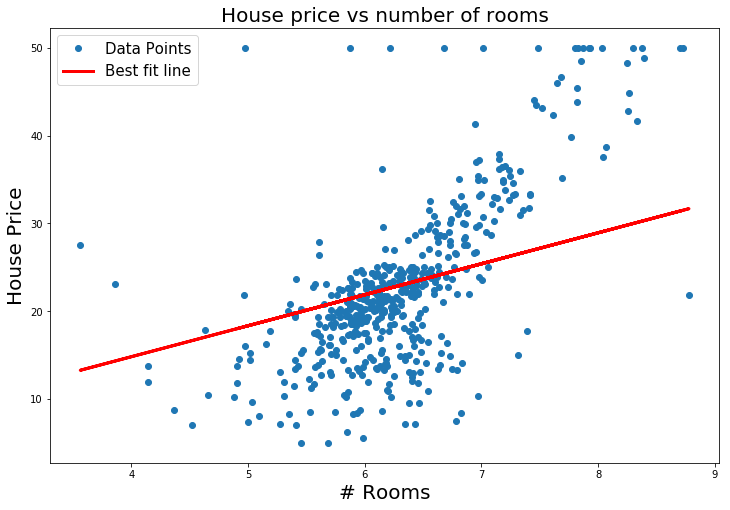

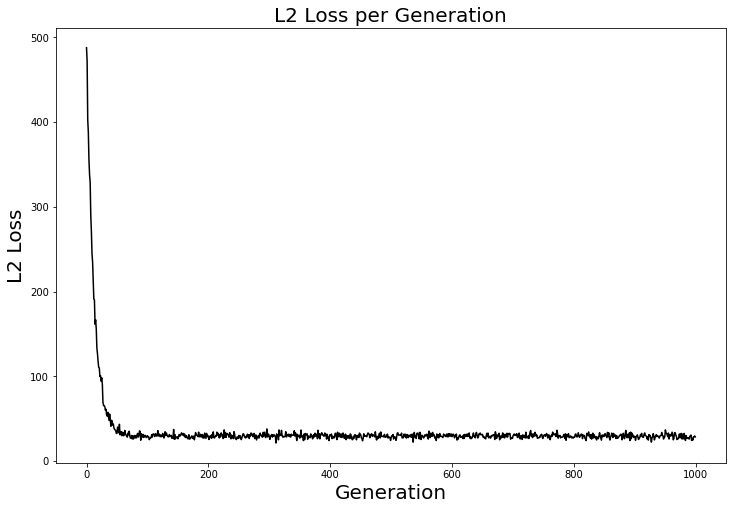

In [7]:
plt.figure(figsize=[12,8])
plt.plot(x_vals, y_vals, 'o', label='Data Points')
plt.plot(x_vals, best_fit, 'r-', label='Best fit line', linewidth=3)
plt.legend(loc='upper left', fontsize = 15)
plt.title('House price vs number of rooms', fontsize = 20)
plt.xlabel('# Rooms', fontsize = 20)
plt.ylabel('House Price', fontsize = 20)
plt.show()


plt.figure(figsize=[12,8])
plt.plot(loss_vec, 'k-')
plt.title('L2 Loss per Generation', fontsize = 20)
plt.xlabel('Generation', fontsize = 20)
plt.ylabel('L2 Loss', fontsize = 20)
plt.show()